In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def gou_step(x, dt, mu, theta, sigma):
    "geometric ornstein-uhlenbeck process"
    eta = np.random.randn(x.shape[0]) * np.sqrt(dt)

    dx= -theta * ( x - mu)* dt + sigma * x * eta
    return dx

In [104]:
N = 1000
T = 20

n_steps = 10000
dt = T/n_steps
params = {
    "theta": 0.5,
    "sigma": 1,
    "mu":10
}

times_array= np.arange(0, n_steps )*dt

print(dt)
print(1/params["theta"])

0.002
2.0


In [105]:

x_0 = np.ones(N)*2

X = [x_0]
x = x_0 + 0
for _ in range(n_steps-1):
    x = x + gou_step(x,dt, **params)
    X.append(x)
    #print(x[0])

X = np.array(X)

In [106]:
X.shape

(10000, 1000)

In [107]:
data = X[-1].flatten()
data.shape

(1000,)

In [108]:
#test normality of the data
import scipy
scipy.stats.normaltest(np.log(data))

NormaltestResult(statistic=120.77243792260191, pvalue=5.951114717792184e-27)

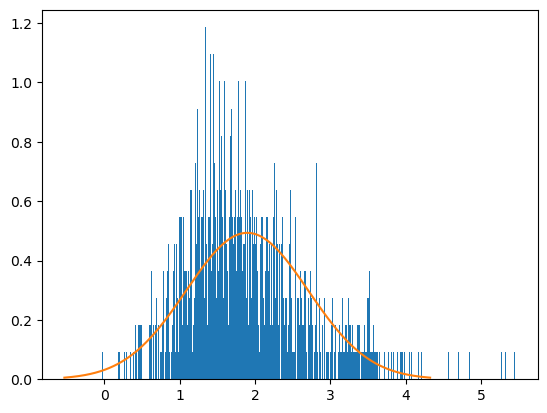

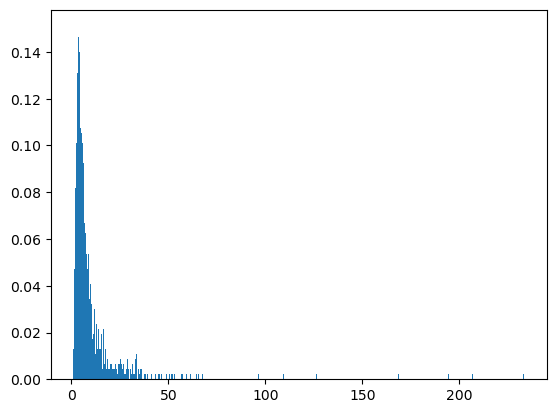

In [109]:
plt.hist(np.log(data), bins=500, density=True)
# compute mean and average
mu = np.mean(np.log(data))
sigma = np.std(np.log(data))
#plot a gaussian with same mean and variance
x = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
y = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)
plt.plot(x,y)
#plt.xlim(2.5,3.5)
plt.show()

plt.hist(data, bins=500, density=True)
plt.show()

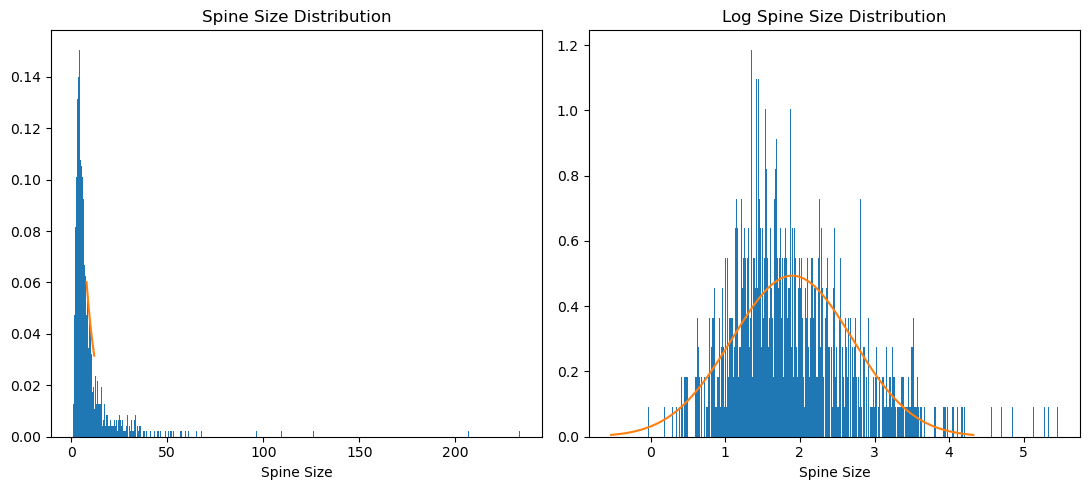

In [110]:
def lognormal_distribution(x, mu, sigma):
    return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((np.log(x)-mu)/sigma)**2)

mu = np.mean(np.log(data))
sigma = np.std(np.log(data))

x = np.linspace(8, 12, 1000)
y = lognormal_distribution(x, mu, sigma)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plot the data in normal scale
axs[0].set_title("Spine Size Distribution")
axs[0].hist(data, bins=500, density=True)
axs[0].plot(x, y)
#label the x axis
axs[0].set_xlabel("Spine Size")

# Plot the data in log-normal scale
axs[1].set_title("Log Spine Size Distribution")
axs[1].hist(np.log(data), bins=500, density=True)
x_log = np.linspace(mu-3*sigma, mu+3*sigma, 1000)
y_log = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x_log-mu)/sigma)**2)
axs[1].plot(x_log, y_log)
axs[1].set_xlabel("Spine Size")


# Show the figure
plt.tight_layout()

plt.savefig("Spine_Size_Distribution.png", transparent=True, dpi=300)
plt.show()


In [111]:
x_mean = np.mean(X, axis=1)
x_var = np.var(X, axis=1)

x_var.shape

(10000,)

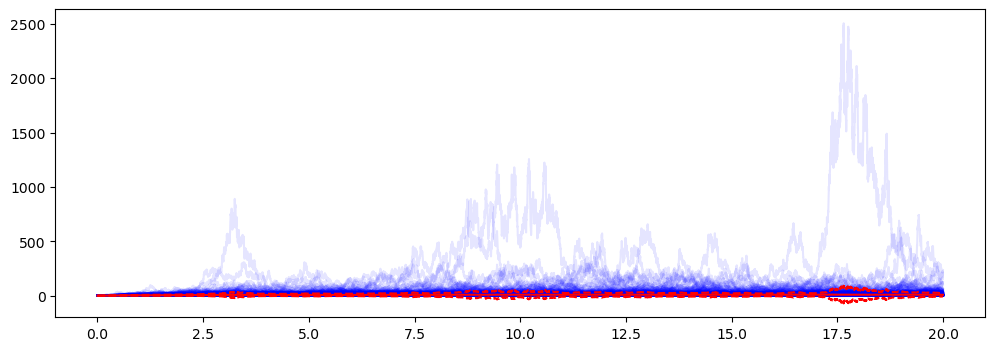

In [112]:
plt.figure(figsize=(12,4))
plt.plot(times_array,X,  'b', alpha = 0.1, )
plt.plot(times_array,x_mean, 'r')
plt.plot(times_array,x_mean-np.sqrt(x_var), 'r--')
plt.plot(times_array,x_mean + np.sqrt(x_var), 'r--')
plt.show()

In [113]:
def exact_mean(x_0, t, mu, theta, sigma):
    return x_0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))

def exact_second_moment(x_0, t, mu, theta, sigma):
    numerator = (
        np.exp(-2 * theta * t) * (
            2 * mu**2 * theta * (
                theta * np.exp(sigma**2 * t) +
                (theta - sigma**2) * np.exp(2 * theta * t) +
                (sigma**2 - 2 * theta) * np.exp(theta * t)
            ) +
            2 * mu * x_0 * theta * (
                2 * theta - sigma**2
            ) * (
                np.exp(theta * t) - np.exp(sigma**2 * t)
            ) +
            x_0**2 * (
                2 * theta**2 - 3 * theta * sigma**2 + sigma**4
            ) * np.exp(sigma**2 * t)
        )
    )

    denominator = 2 * theta**2 - 3 * theta * sigma**2 + sigma**4

    return numerator / denominator


def exact_var(x_0, t, mu, theta, sigma):
    return exact_second_moment(x_0, t, mu, theta, sigma) - exact_mean(x_0, t, mu, theta, sigma)**2


def var_theoretical(mu,sigma,theta):
    num = 2*theta*mu**2*(theta-sigma**2)
    den = 2*theta**2 - 3*theta*sigma**2 + sigma**4
    return num/den - mu**2


In [114]:
x_mean_exact = exact_mean(x_0[0], times_array, **params)
x_var_exact = exact_var(x_0[0],times_array, **params)

/tmp/ipykernel_22160/681357007.py:25: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator


In [115]:
# #plot it
#
# plt.figure(figsize=(12,6))
# plt.plot(times_array, X, 'b', alpha = 0.01)
# plt.plot(times_array,x_mean, 'r', label = "Empirical Mean")
# plt.plot(times_array,x_mean-np.sqrt(x_var), 'r--')
# plt.plot(times_array,x_mean + np.sqrt(x_var), 'r--')
# plt.plot(times_array, x_mean_exact, 'g', label = "Theoretical Mean")
# plt.plot(times_array, x_mean_exact-np.sqrt(x_var_exact), 'g--')
# plt.plot(times_array, x_mean_exact + np.sqrt(x_var_exact), 'g--')
# plt.xlabel("Time")
# plt.ylabel("Spine Size")
# fig_title= f"Spine Size: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
# plt.title(fig_title)
# plt.legend()
#
# fig_name = fig_title.replace(" ", "_").replace(":", "_")
# #save figure with transparent background as pdf
# plt.savefig(f"{fig_name}.png", transparent=True)
# plt.show()

In [116]:
print(x_var[-100:].mean())

mu = params["mu"]
sigma = params["sigma"]
theta = params["theta"]

num = 2*theta*mu**2*(theta-sigma**2)
den = 2*theta**2 - 3*theta*sigma**2 + sigma**4

var = var_theoretical(**params)



print(var)

299.67048114588636


ZeroDivisionError: float division by zero

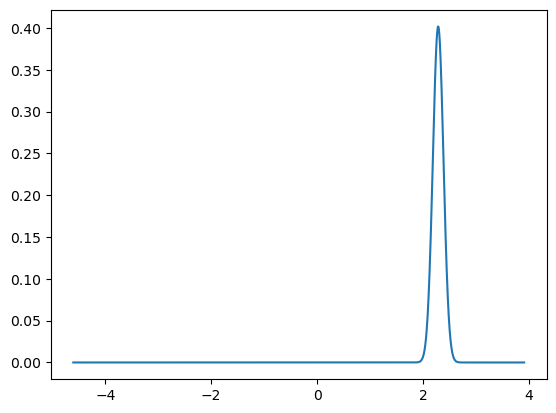

In [119]:
# create a lognormal distribution

def lognormal_distribution(x, mu, sigma):
    return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((np.log(x)-mu)/sigma)**2)

x = np.linspace(0.01, 50, 1000)

mean_LN = np.log(mu**2/np.sqrt(var + mu**2))
var_LN = np.log(1 + var/mu**2)


mu_x = x_mean[-1]
sigma_x = np.sqrt(x_var[-1])

mu_emp = np.log(mu_x**2/np.sqrt(sigma_x**2 + mu_x**2))
var_emp = np.log(1 + sigma_x**2/mu_x**2)

y = lognormal_distribution(x, mean_LN, np.sqrt(var_LN))
y_emp = lognormal_distribution(x, mu_emp, np.sqrt(var_emp))

#y = lognormal_distribution(x, 1, 1)


plt.plot(np.log(x),y)
plt.show()

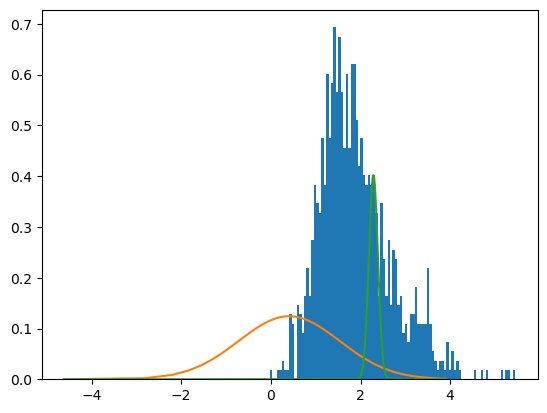

In [120]:
plt.hist(np.log(X[-1]), bins=100, density=True)
plt.plot(np.log(x),y_emp)
#plot the lognormal distribution on top
plt.plot(np.log(x),y)
plt.show()

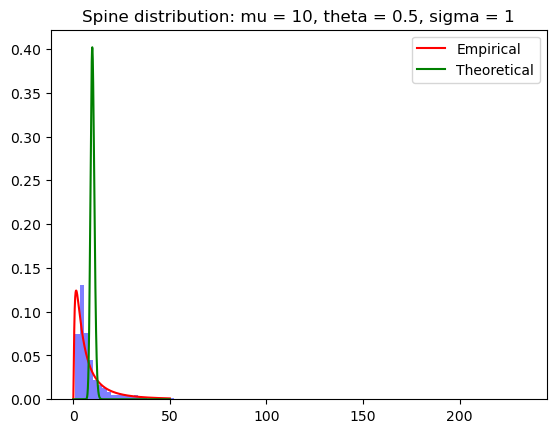

In [121]:
#make hist with blue bars
plt.hist(X[-1], bins=100, density=True, color='b', alpha=0.5)
plt.plot(x,y_emp, 'r')
plt.plot(x,y, 'g')
#plot the lognormal distribution on top
fig_title= f"Spine distribution: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
plt.title(fig_title)
plt.legend(["Empirical", "Theoretical"])


fig_name = fig_title.replace(" ", "_").replace(":", "_")
#save figure with transparent background as pdf
plt.savefig(f"{fig_name}.pdf", transparent=True)
plt.show()

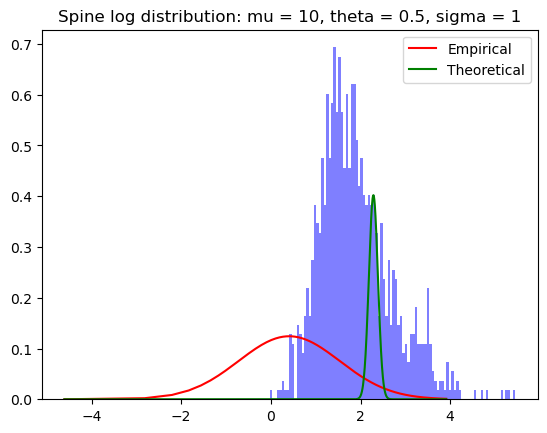

In [122]:
# the same in log-scale
plt.hist(np.log(X[-1]), bins=100, density=True, color='b', alpha=0.5)
plt.plot(np.log(x),y_emp, 'r')
plt.plot(np.log(x),y, 'g')
#plot the lognormal distribution on top
fig_title= f"Spine log distribution: mu = {params['mu']}, theta = {params['theta']}, sigma = {params['sigma']}"
plt.title(fig_title)
plt.legend(["Empirical", "Theoretical"])

fig_name = fig_title.replace(" ", "_").replace(":", "_")
#save figure with transparent background as pdf
plt.savefig(f"{fig_name}.pdf", transparent=True)


plt.show()


In [123]:
import scipy

scipy.stats.normaltest(np.log(X[-1]))

NormaltestResult(statistic=120.77243792260191, pvalue=5.951114717792184e-27)

In [124]:
print(mu_emp, var_emp)
print(mean_LN, var_LN)

1.683549177267021 1.2752294131281068
2.297559925067295 0.010050335853501506


In [125]:
print(mu_x, sigma_x)
print(mu, np.sqrt(var))

10.187524503657423 16.362073038865816
10 1.0050378152592123


In [126]:
var_LN

0.010050335853501506

In [127]:
def mu_LN_from_params(mu, sigma, theta):
    return np.log(mu * np.sqrt(1 - sigma**2/2*theta))

def sigma_LN_from_params(mu, sigma, theta):
    return np.sqrt(np.log(1/(1  - sigma**2/(2*theta))))



In [128]:
print(sigma_LN_from_params(mu, sigma, theta)**2)

ZeroDivisionError: float division by zero

In [129]:
#compue the autocorrelation of the process

def autocovariance(x, lag):

    if lag == 0:
        return np.var(x)

    n = len(x)
    x_mean = np.mean(x)
    x_lag = x[lag:]
    x = x[:-lag]
    return np.sum((x - x_mean)*(x_lag - x_mean))/n

In [130]:


for i in range(0, 100):
    print(autocovariance(X[5000:,0], i))

141.14288664826165
140.64864809932
140.17281105287955
139.70959384161733
139.2356851878813
138.76135283456625
138.29717839919323
137.84441136717118
137.37158315474008
136.90521713793206
136.4606774039811
136.04079093163884
135.57630351206848
135.14218560422674
134.71150898112194
134.27754475670937
133.83896278372933
133.4024011016086
132.96450064487524
132.56182199475657
132.17273856103736
131.8057535942129
131.43835837113667
131.0485638586413
130.6431562324719
130.21719057423357
129.79806648994926
129.3768158827813
128.97016424456172
128.56559172149423
128.17596360654034
127.77382283274457
127.36978568717034
126.9945177446112
126.65013149938154
126.29374141509794
125.92853513667593
125.5339141860808
125.14027238169122
124.74666982038093
124.34451367387796
123.92795406528695
123.52513336254246
123.10745251183901
122.70818882954491
122.31695452285001
121.9231888829596
121.54351400176012
121.13817146260966
120.72820789411128
120.33429012350375
119.9746705511787
119.6274590427933
119.2603

In [131]:
tot_a_cov = []
time_range_cov = np.arange(0, 6000)
for m in range(100):
    a_cov = [autocovariance(X[1000:,m], i) for i in time_range_cov]
    tot_a_cov.append(a_cov)



KeyboardInterrupt: 

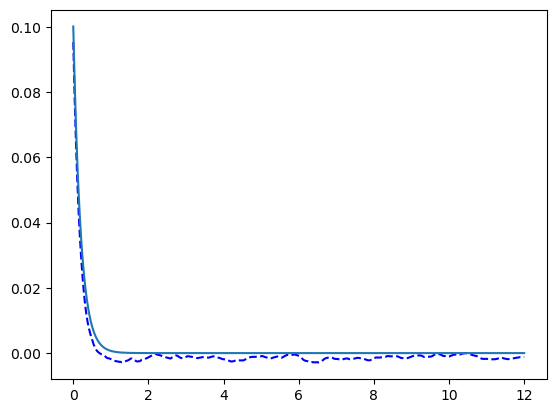

In [40]:
#compute the time interval

#plt.plot(dt* np.arange(0, 4000), np.array(tot_a_cov).T, 'r', alpha = 0.1)
plt.plot(dt* time_range_cov, np.array(tot_a_cov).T.mean(axis=1), 'b--')
# plot a decaying exponential

plt.plot(dt* time_range_cov,mu**2 * sigma**2 / (2*theta-sigma**2) *np.exp(-theta*time_range_cov*dt))

In [41]:
mu**2 * sigma**2 / (2*theta-sigma**2)

0.10010010010010012

In [42]:
var_theoretical(**params)

0.10010010010009296

In [43]:
def my_autocov(X, lag):
    x = X[-1]
    y = X[-1-lag]
    return np.mean((x - np.mean(x))*(y - np.mean(y)))

In [44]:
a_cov_2 = [my_autocov(X, i) for i in time_range_cov]



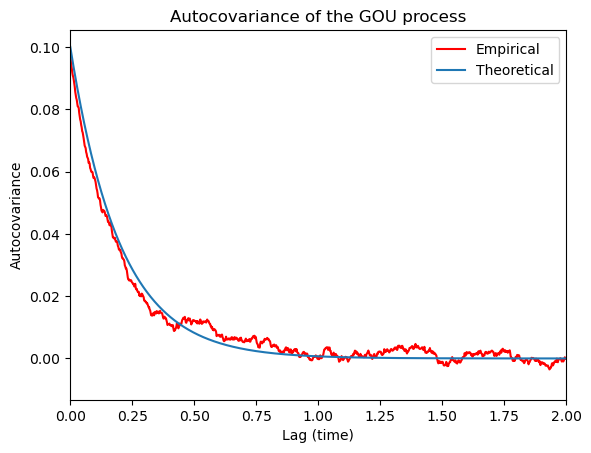

In [51]:
plt.plot(dt* time_range_cov, a_cov_2, 'r', label = "Empirical")
#plt.plot(dt* time_range_cov, np.array(tot_a_cov).T.mean(axis=1), 'b--')
plt.plot(dt* time_range_cov,mu**2 * sigma**2 / (2*theta-sigma**2) *np.exp(-theta*time_range_cov*dt), label="Theoretical")
plt.xlabel("Lag (time)")
plt.ylabel("Autocovariance")
plt.title("Autocovariance of the GOU process")
plt.xlim(0,2)
plt.legend()
plt.savefig("Autocovariance_GOU.png", transparent=True)
plt.show()

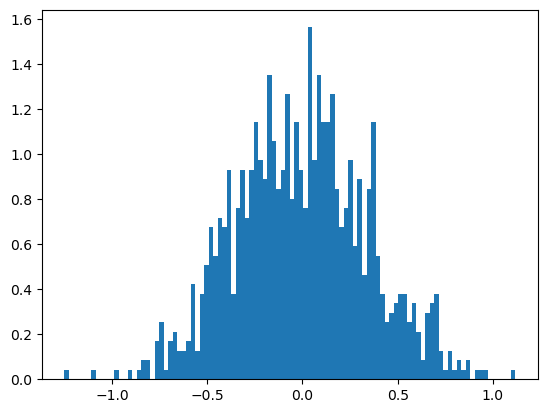

In [46]:
diff = X[-1]-X[-100]
diff2 = X[-100] - X[-200]

plt.hist(diff, bins=100, density=True)
plt.show()

-0.6308564710670531


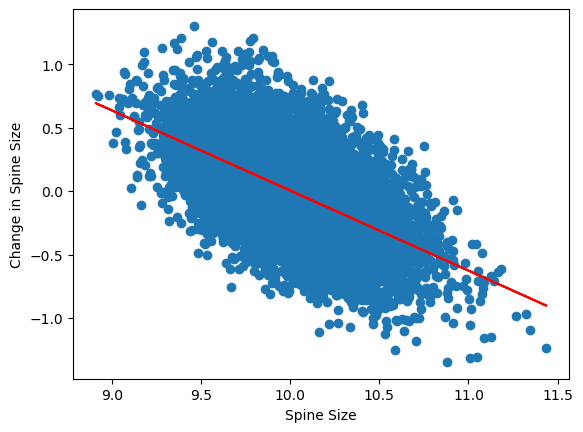

In [63]:
plt.scatter(X[-100], diff)
plt.xlabel("Spine Size")
plt.ylabel("Change in Spine Size")

#do a linear fit and plot it
m, b = np.polyfit(X[-100], diff, 1)
print(m)
    
# create figure
plt.plot(X[-100], m*X[-100] + b, 'r')
plt.savefig("Change_in_spine_size.png", transparent=True)
plt.show()



-0.2854231528394285


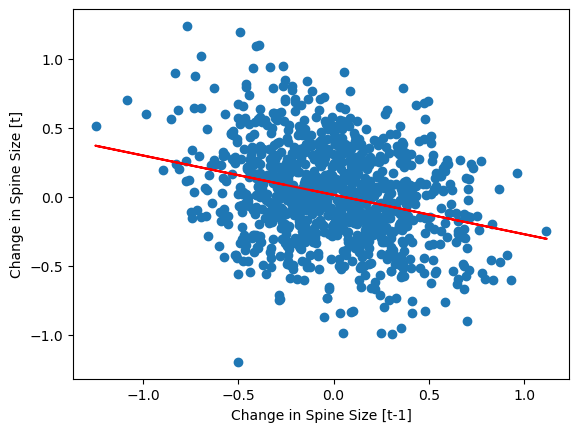

In [49]:
plt.scatter(diff, diff2)
plt.xlabel("Change in Spine Size [t-1]")
plt.ylabel("Change in Spine Size [t]")

#do a linear fit and plot it
m, b = np.polyfit(diff, diff2, 1)
print(m)
plt.plot(diff, m*diff + b, 'r')
#save the figure with high resolution
plt.savefig("Change_in_spine_size_correlation.png", transparent=True, dpi=300)
plt.show()
